# IST 652 - Lecture 8B

---

## Explore:
- XML
    - DOM
    - ElementTree

### XML and ElementTree Tutorials
Material taken from the online book “Dive into Python 3” by Mark Pilgrim
- https://www.diveinto.org/python3/xml.html

## XML
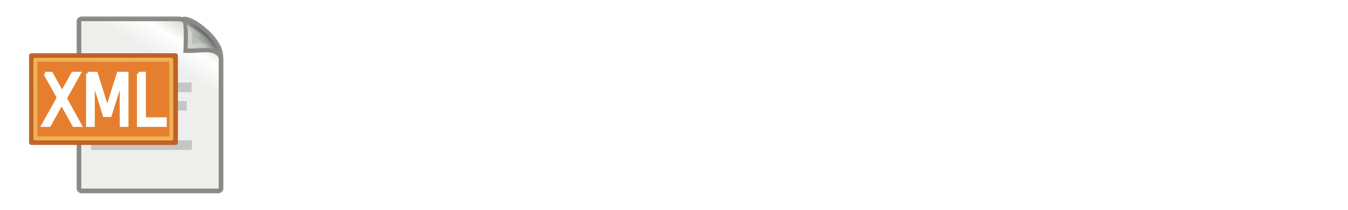

#### <u>XML</u> - Extensible Markup Language is designed as a format for data interchange between systems.

- It is extensible because, unlike HTML, you design your own tag names to represent the data.
- As a markup language, it consists of a set of well-defined tags and attributes that hold the data.
- The specifications of the language are defined by the W3C.

For more general use, a <b>DTD</b> (data type definition), or the newer XML Schema, can be given that defines to both the creators and users of an XML file what the valid tag structure is, and there are some types of parsers that validate the structure as well as parse.
- For more on DTD: https://www.w3schools.com/xml/xml_dtd.asp

- 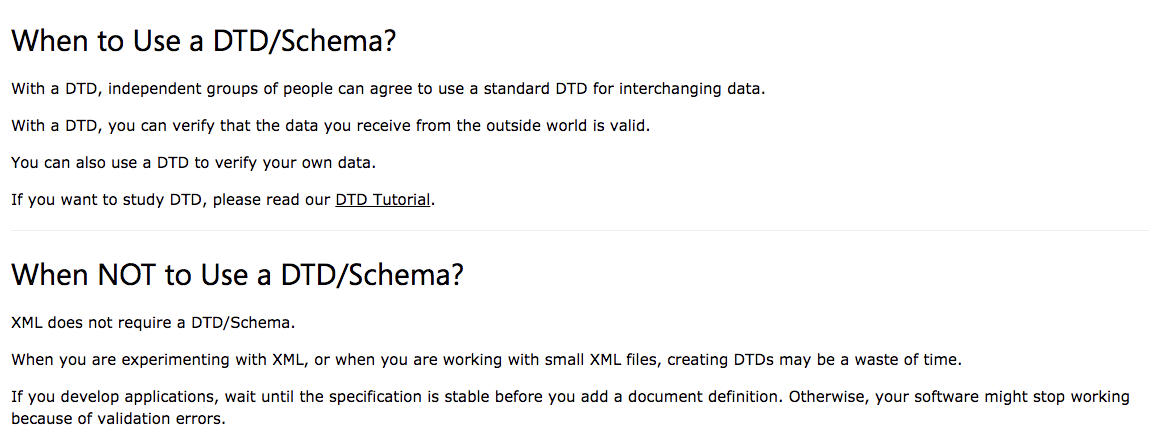

---

A collection of XML definitions may need to define a <u>namespace</u> so that the different type definitions don’t having to worry about having unique names.  These namespaces can be defined in the opening tag of an <b>XML</b> file with the xmlns attribute.
- <u>Namespace</u>:  A set of symbols in computing that are used to organize objects of various kinds, so that these objects may be referred to by name.

---
Here is a simple example of an xml file that might come from an RSS feed:

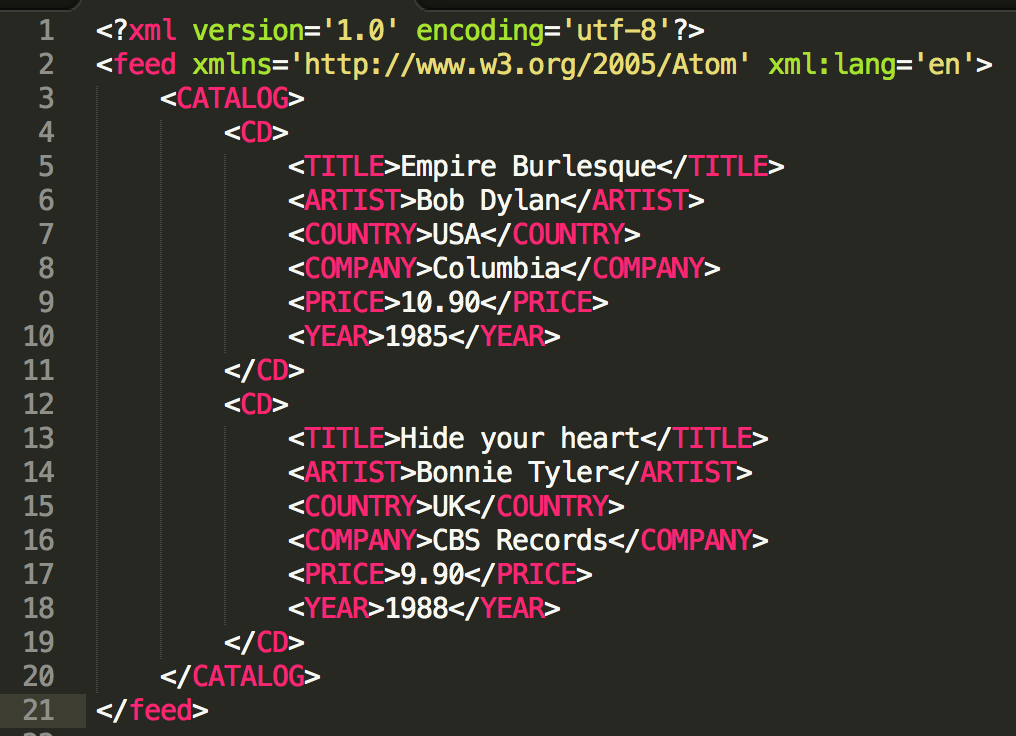

- (1) The first line is an XML declaration that contains information about the xml version and the character encoding.
- (2) The second line defines the root element and gives the namespace and language as attributes.

---
Every XML document has one root tag, and the structure of the data is given by a set of elements, which consist of hierarchical start and end tags of the form:

#### < tag >   ------    < /tag >

or if the element’s tag has no actual content (perhaps only attributes), it can combine the start and end:

#### < tag/ >

---

### Tags are nested and can have attributes.

< foo lang='en' >
  < bar id='papayawhip' lang="fr" > Papaya Whip Special < /bar >  
< /foo >

The <u><i>lang</u></i> attribute in the two different tags are independent.

### NOTE:
- The two attributes on the bar tag can occur in any order.
    - < bar lang="fr" id='papayawhip' >
- Any text content appears between the start and the end tags.
- XML documents may have comments inside special tags <!-- and -->

Some characters that are used for the markup part of XML, to show tags and their structures, cannot then occur as characters in the text contents of an element without some escape mechanism.<br>
<b>These are called the predefined entities and are:</b>
- &lt;
- &gt;
- &amp;
- &apos;
- &quot;

Representing < (less than), > (greater than), & (ampersand), ‘ (apostrophe), and “(quote), respectively.

If you want to include raw text without escaping these characters, then you can include a <b>CDATA</b> section.
- For more on CDATA: https://www.w3.org/TR/REC-xml/#sec-cdata-sect
- Used for escape characters

There are several other specifications of related technologies, including XPath, which is a syntax for selecting an element of an XML document by giving the path through the tag hierarchy that leads to that element.
- For more information on XPath: https://www.w3schools.com/xml/xml_xpath.asp

##### Many Specific XML Languages Have Been Defined.

This includes the standard for <b>Atom</b>, which includes a specification language for the data obtained from web feeds and also a specification for the <u>HTTP</u> protocol that allows the server side to create and update web content.
- This standard is now used a lot for web blogs and RSS feeds.
- For more on Atom: https://validator.w3.org/feed/docs/atom.html

## DOM

After an XML file or document has been obtained by a program, it needs to convert the string or text representation into an internal structure.

- Traditionally this has been the DOM, Document Object Model, also defined by W3C.
- Many languages implemented both SAX and DOM parsers to convert text into this internal structure.
    - The <b>SAX</b> parsers parse the XML structure in a linear fashion, producing parts of the structure as they go.
        - This can give a more efficient implementation and may also be important for large structures that are streamed or that may not fit into memory at one time.
    - The <b>DOM</b> parsers convert the entire text to a structure at one time. 

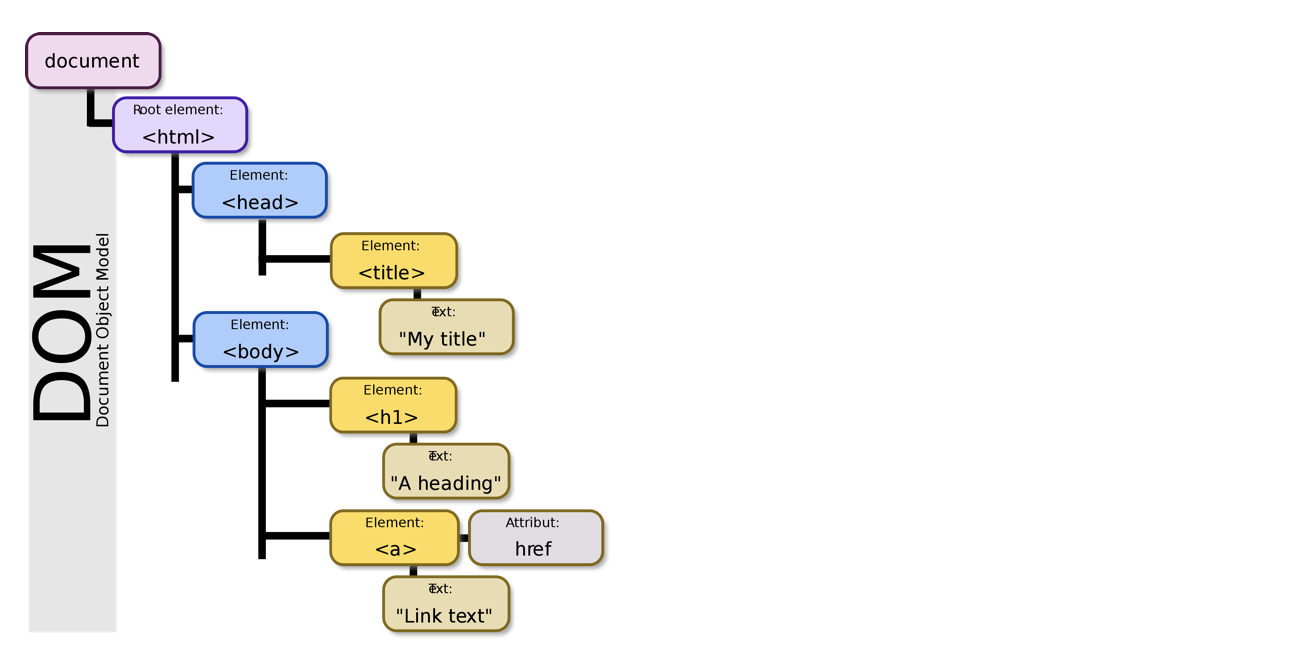

- The internal design is a tree structure consisting on a node for every tag.
- The tags nested directly inside another tag are its children.
- Any node (tag) may have attributes and contents corresponding to the attributes and contents of the tag.

While Python has several packages that provide traditional DOM parsers, a common standard is the <b>ElementTree</b> parser.

- The BeautifulSoup package also parses XML as well as HTML.
- And the package <b>lxml</b> is used for faster parsing and a more extensive query language.

----

### Retrieve Information About Current News Stories from the XML Document
- One of the uses of XML is for documents returned by <b>RSS feeds</b>.
- 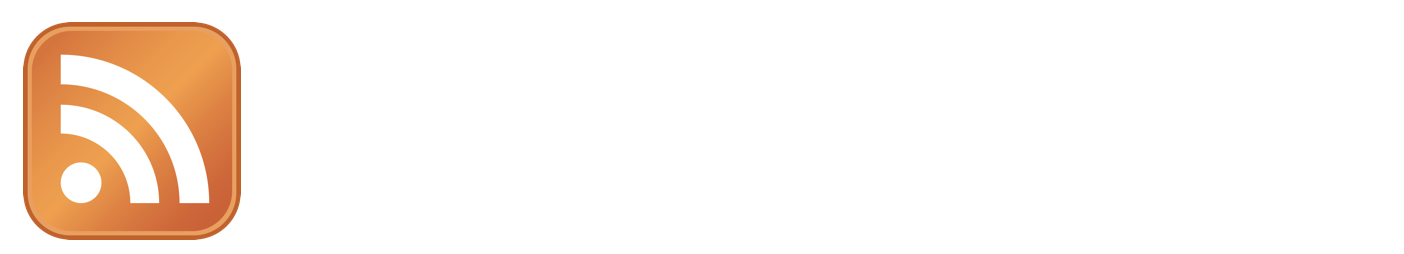

<b>RSS</b>: A type of web feed which allows users and applications to access updates to online content in a standardized, computer-readable format.
- These feeds can, for example, allow a user to keep track of many different websites in a single news aggregator.
- RSS on Wikipedia: https://en.wikipedia.org/wiki/RSS

In [2]:
import urllib.request

In [51]:
url = "http://feeds.bbci.co.uk/news/rss.xml"
# site:

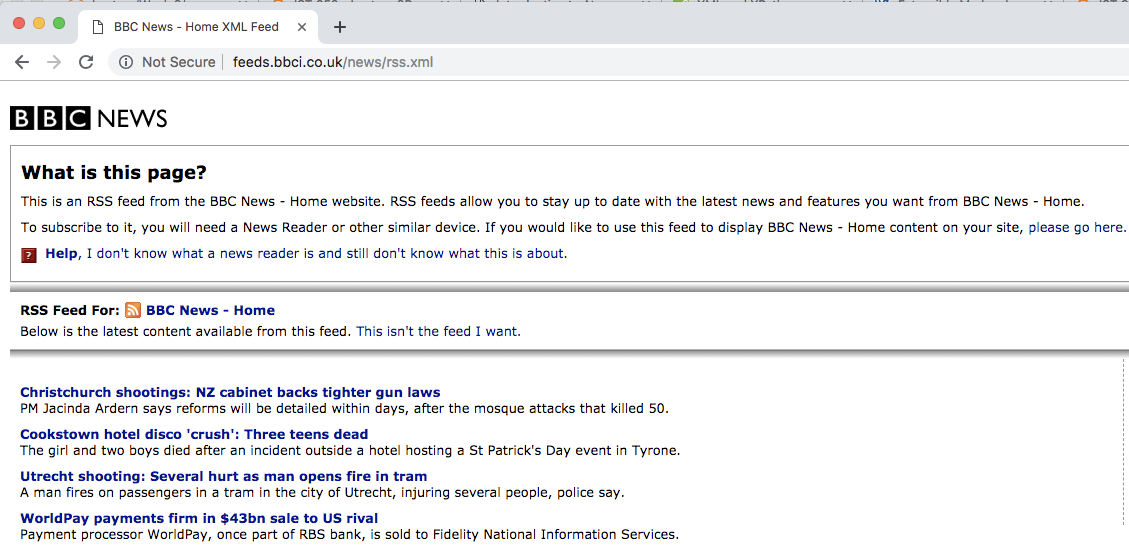

In [9]:
xmlstring = urllib.request.urlopen(url).read().decode('utf8')
len(xmlstring)

36865

In [54]:
print(xmlstring[:500])

<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet title="XSL_formatting" type="text/xsl" href="/shared/bsp/xsl/rss/nolsol.xsl"?>
<rss xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:content="http://purl.org/rss/1.0/modules/content/" xmlns:atom="http://www.w3.org/2005/Atom" version="2.0" xmlns:media="http://search.yahoo.com/mrss/">
    <channel>
        <title><![CDATA[BBC News - Home]]></title>
        <description><![CDATA[BBC News - Home]]></description>
        <link>https://www.bbc.c


### NOTE:
- See also the Atom example in the Dive into Python reference.
- 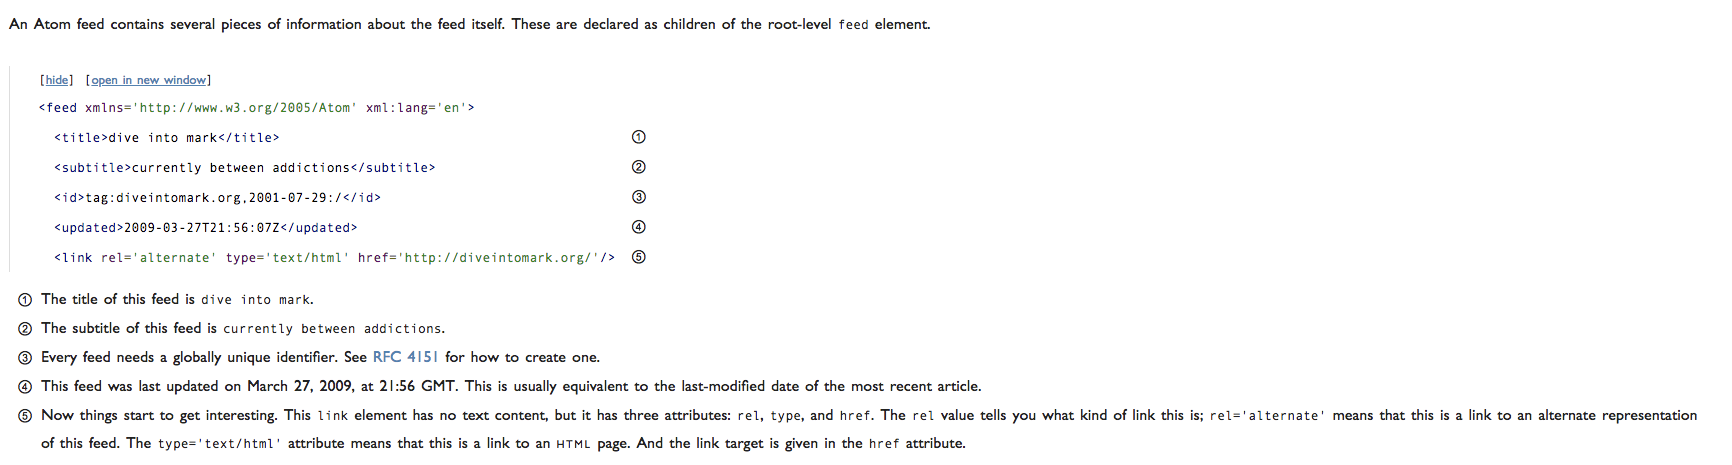

It’s not very convenient to have to look at the structure of the XML like this, so I also saved it to a file, where the line feeds make it more readable.

In [55]:
filepath = 'bbc2019.xml'

In [56]:
out = open(filepath, 'w')
out.write(xmlstring)
out.close()

---

## ElementTree

#### The ElementTree package is part of the Python standard library.
- Its main function is the parse() function, which wants to take a file or “file-like object” and return the tree structure.
- Since we have a string, we can turn it into a stream, which is like a file in that there is a read() function that gives its contents.

In [19]:
import xml.etree.ElementTree as etree
import io

In [20]:
xmlfile = io.StringIO(xmlstring)
tree = etree.parse(xmlfile)
type(tree)

xml.etree.ElementTree.ElementTree

- What we have is the entire tree structure of the document.
- We can access the document structure by getting the root node, or element, and then traversing the tree by looking at each element and then getting its children.

In [21]:
root = tree.getroot()
type(root)

xml.etree.ElementTree.Element

#### From each element, you can get the tag, the attributes and the content as follows:

In [23]:
root.tag

'rss'

In [22]:
root.attrib

{'version': '2.0'}

In [24]:
root.text

'\n    '

Note that the attributes are returned as a python dictionary where each tag name is a key in the dictionary and the value is the dictionary value.
- The contents given by the ‘text’ is a string, in this case consisting of some spaces and a line feed.

Each element can also be treated as a list by iterating over it, and that gives the list of children.
- As a list, the root element only has one child:

In [25]:
len(root)

1

In [26]:
for child in root:
    print(child)

<Element 'channel' at 0x1123b3db8>


Now we can start traversing the tree by getting the child node, which is the first and only element of the root list.

In [28]:
firstchild = root[0]
firstchild

<Element 'channel' at 0x1123b3db8>

In [29]:
type(firstchild)

xml.etree.ElementTree.Element

In [30]:
firstchild.tag

'channel'

In [31]:
firstchild.attrib

{}

In [32]:
firstchild.text

'\n        '

In [33]:
len(firstchild)

65

#### We can continue this process by looking at the first of these children:

In [35]:
firstgrandchild = firstchild[0]
firstgrandchild

<Element 'title' at 0x1123b3e08>

In [36]:
firstgrandchild.tag

'title'

In [37]:
firstgrandchild.attrib

{}

In [38]:
firstgrandchild.text

'BBC News - Home'

#### This is the title tag of the channel tag.

But looking at the file, we can see that what we want are not all of the children of the channel tag, but all the ones with the tag <b>item</b>.  So instead of traversing the tree, we can use the findall function to get all of the item tags that are direct children of the channel tag.
- We’ll look at the first of these:

In [39]:
itemlist = firstchild.findall('item')
len(itemlist)

56

In [40]:
firstitem = itemlist[0]
firstitem.attrib

{}

In [41]:
firstitem.text

'\n            '

In [42]:
len(firstitem)

6

In [43]:
for element in firstitem:
     print(element.tag, element.attrib, element.text)

title {} St Patrick's Day event at Cookstown hotel ends with two deaths
description {} Police are investigating what happened at the event for young people at a hotel in Cookstown, Co Tyrone.
link {} https://www.bbc.co.uk/news/uk-northern-ireland-47606006
guid {'isPermaLink': 'true'} https://www.bbc.co.uk/news/uk-northern-ireland-47606006
pubDate {} Mon, 18 Mar 2019 02:51:31 GMT
{http://search.yahoo.com/mrss/}thumbnail {'width': '976', 'height': '549', 'url': 'http://c.files.bbci.co.uk/15F0/production/_106061650_cookstownmore.jpg'} None


### NOTE:
We can use each of the elements corresponding to an item tag as a list, where the first child on the list is the title, the second is the description, and so on.
- Although we don’t need these in our program, another useful function is the <b>find()</b> function, which returns the first item that matches the tag.

In [44]:
firstitem = firstchild.find('item')

In [45]:
firstitem

<Element 'item' at 0x1123c3318>

And with the findall function, there is additional notation, called the query language, in which you can give path information to guide the search. If we want to search the entire subtree of all the children, we add ‘//’ to our search tag.

- Here is how to find all the title tags in the entire document:

In [49]:
alltitles = tree.findall('.//title')
len(alltitles)

58

In [50]:
for title in alltitles[:6]:
    print(title.text)

BBC News - Home
BBC News - Home
St Patrick's Day event at Cookstown hotel ends with two deaths
Christchurch shootings: Stories of heroism emerge from attacks
Christchurch shootings: The New Zealanders rallying to help victims
Brexit: No new vote on May's deal without DUP support - chancellor


In addition to the capabilities of accessing information in XML documents, the python packages such as ElementTree allow you to create new XML documents.

---

## Review:
- XML
    - DOM
    - ElementTree